In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C:\Users\anu07\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
#Import Iris data
data_df = pd.read_csv('./data/modifiedIris2Classes.csv')
data_df.head()
#data_df.shape

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [15]:
X = data_df.loc[:,['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
Y = data_df.loc[:,'target'].values
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [16]:
#Standardize the data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Import model
reg = LogisticRegression()

In [19]:
reg.fit(X_train, y_train)

C:\Users\anu07\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_test_predict = reg.predict(X_test)

In [29]:
#Check Model performance
score = reg.score(X_test, y_test)
print(score)

0.92


In [35]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_predict)
cm

array([[11,  2],
       [ 0, 12]], dtype=int64)

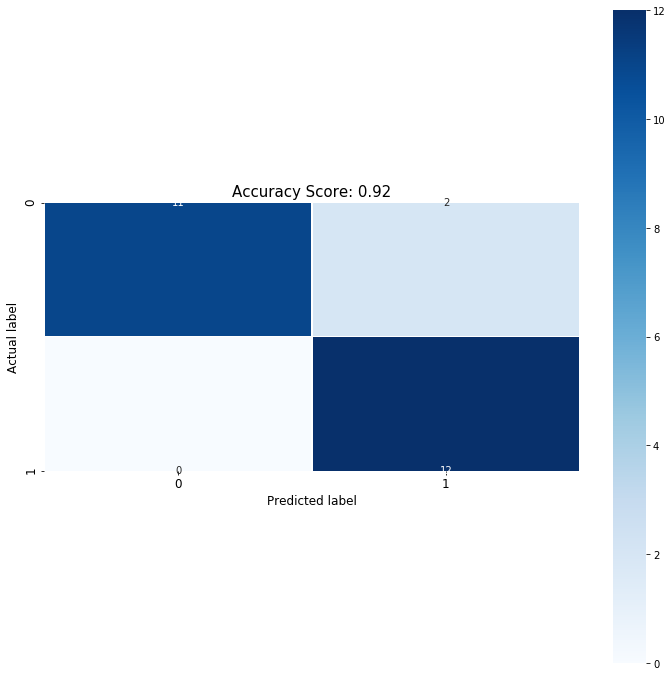

In [34]:
#Plot the confusion matrix
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12)
plt.title('Accuracy Score: {}'.format(score), size = 15);
plt.tick_params(labelsize= 12)

#Logistic Regression for Multiple Classes
### Using the One vs Rest  
#### Technique to use binary classifiers for multiclass problems

In [38]:
#Load the dataset
multi_df= pd.read_csv('./data/modifiedDigits4Classes.csv')

In [45]:
multi_df.shape

(720, 65)

In [54]:
X = multi_df.loc[:,'0':'63'].values
Y = multi_df.loc[:,'label'].values
X.shape

(720, 64)

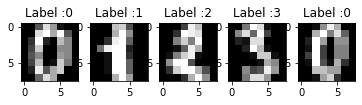

In [61]:
#Data plot
for i in range(0,5):
    plt.subplot(1, 5, 1 + i )
    image_values = X[i,:]
    image_label = Y[i]
    plt.imshow(image_values.reshape(8,8), cmap = 'gray')
    plt.title('Label :'+ str(image_label))
    

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [63]:
#Standardise the data
scale = StandardScaler()
